In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt



In [ ]:
walking_folder = '/content/drive/MyDrive/DL/pose estimation/walking'
sitting_folder = '/content/drive/MyDrive/DL/pose estimation/sitting'
studying_folder = '/content/drive/MyDrive/DL/pose estimation/studying'
presenting_folder = '/content/drive/MyDrive/DL/pose estimation/presenting'
standing_folder = '/content/drive/MyDrive/DL/pose estimation/standing'



def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images


walking_images = load_images_from_folder(walking_folder)
sitting_images = load_images_from_folder(sitting_folder)
studying_images = load_images_from_folder(studying_folder)
presenting_images = load_images_from_folder(presenting_folder)
standing_images = load_images_from_folder(standing_folder)

In [ ]:

image_height = 224
image_width = 224

walking_images = [cv2.resize(img, (image_width, image_height)) for img in walking_images]
sitting_images = [cv2.resize(img, (image_width, image_height)) for img in sitting_images]
studying_images = [cv2.resize(img, (image_width, image_height)) for img in studying_images]
presenting_images = [cv2.resize(img, (image_width, image_height)) for img in presenting_images]
standing_images = [cv2.resize(img, (image_width, image_height)) for img in standing_images]

In [ ]:

all_images = walking_images + sitting_images + studying_images + presenting_images + standing_images
all_labels = [0] * len(walking_images) + [1] * len(sitting_images) + [2] * len(studying_images) + [3] * len(presenting_images) + [4] * len(standing_images)

X = np.array(all_images)
y = np.array(all_labels)


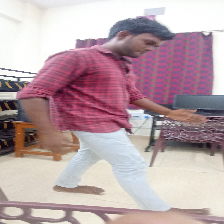

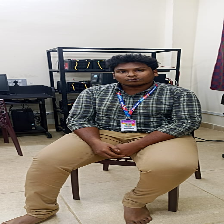

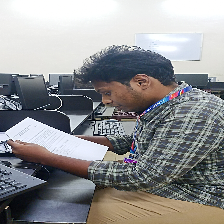

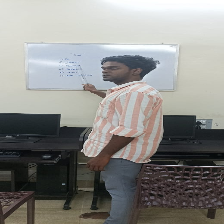

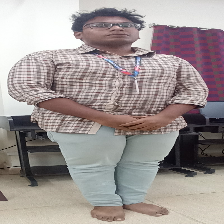

In [ ]:

pose_categories = {
    'Walking': walking_images,
    'Sitting': sitting_images,
    'Studying': studying_images,
    'Presenting': presenting_images,
    'Standing' : standing_images
}

for pose, images in pose_categories.items():
    if images:
        random_index = np.random.randint(len(images))
        random_image = images[random_index]
        cv2_imshow(random_image)
    else:
        print(f"No images found for {pose} pose.")


In [ ]:

image_height = 224
image_width = 224

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train / 255.0
X_test = X_test / 255.0



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(28, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 28)      4060      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 28)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        16192     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

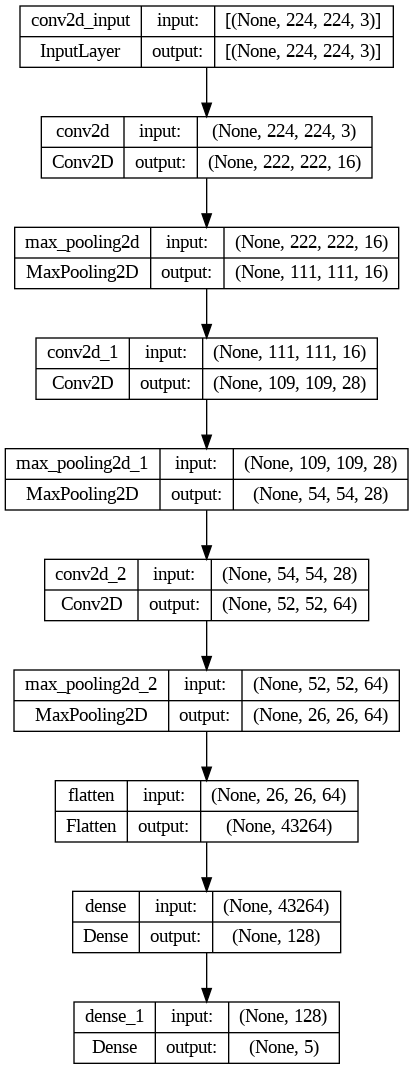

In [ ]:
from tensorflow.keras.utils import plot_model

# ...

# Save the model architecture diagram to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
history=model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
2/2 [==============================] - 5s 1s/step - loss: 2.8699 - accuracy: 0.1136 - val_loss: 4.0929 - val_accuracy: 0.1818
Epoch 2/15
2/2 [==============================] - 3s 828ms/step - loss: 3.2130 - accuracy: 0.3182 - val_loss: 1.6844 - val_accuracy: 0.2727
Epoch 3/15
2/2 [==============================] - 3s 847ms/step - loss: 1.4739 - accuracy: 0.4318 - val_loss: 1.2476 - val_accuracy: 0.5455
Epoch 4/15
2/2 [==============================] - 6s 2s/step - loss: 1.1543 - accuracy: 0.6364 - val_loss: 1.1893 - val_accuracy: 0.7273
Epoch 5/15
2/2 [==============================] - 5s 2s/step - loss: 0.9360 - accuracy: 0.7273 - val_loss: 1.0641 - val_accuracy: 0.6364
Epoch 6/15
2/2 [==============================] - 4s 1s/step - loss: 0.7007 - accuracy: 0.9318 - val_loss: 0.8950 - val_accuracy: 0.7273
Epoch 7/15
2/2 [==============================] - 7s 2s/step - loss: 0.4626 - accuracy: 1.0000 - val_loss: 0.6969 - val_accuracy: 0.8182
Epoch 8/15
2/2 [===================

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

1/1 [==============================] - 0s 164ms/step - loss: 0.5405 - accuracy: 0.8182
Test loss: 0.5404756665229797
Test accuracy: 0.8181818127632141


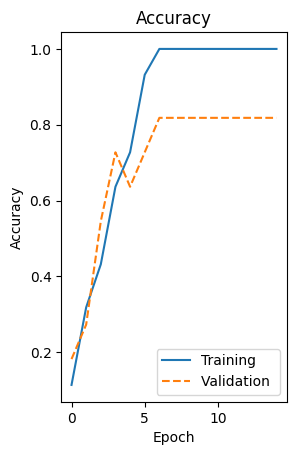

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training', linestyle='solid')
plt.plot(history.history['val_accuracy'], label='Validation ', linestyle='dashed')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_width, image_height))
    img = img / 255.0
    return img

user_image_path = input("Enter the path to the image you want to classify: ")


user_image = preprocess_image(user_image_path)


predicted_class = model.predict(np.expand_dims(user_image, axis=0))
predicted_class_index = np.argmax(predicted_class)

pose_categories_reverse = {0: 'Walking', 1: 'Sitting', 2: 'Studying', 3: 'Presenting', 4: 'Standing'}
predicted_pose = pose_categories_reverse[predicted_class_index]


print(f"The predicted pose of the image is: {predicted_pose}")
